<a href="https://colab.research.google.com/github/KawiraSharon/.io/blob/main/Profiling_matrix_multiplication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Matrix multiplication
Matrix multiplication is a fundamental operation in numerical linear algebra.

Given two matrices:

Matrix A with size $l \times m$
Matrix B with size $m \times n$
 The product will be a matrix C of size $l \times n$
This is Wikipedia's entry on Matrix Multiplication:

https://en.wikipedia.org/wiki/Matrix_multiplication#:~:text=For%20matrix%20multiplication%2C%20the%20number,B%20is%20denoted%20as%20AB.

To simplify things, we will use square matrices, with the same number of rows and columns, for the following examples.

Let's create a couple of sample matrices.

It is possible to create a file in COLAB using the directive %%writefile nameOfTheFil

In [1]:
%%writefile A_4.Text
4
1 2 3 4
5 6 7 8
9 10 11 12
13 14 15 16

Writing A_4.Text


In [2]:
%%writefile B_4.Text
4
1 0 0 0
0 1 0 0
0 0 1 0
0 0 0 1

Writing B_4.Text


Now, let's create a program that reads both files, multiplies the corresponding matrices and then prints the result.

In [4]:
%%writefile matrix_multiplication.py
import sys
import time

def read_file(file_name):
  file_object = open(file_name, "r")
  # Input the number of rows and columns
  size = int(file_object.readline())
  rows = size
  cols = size
  # Initialize an empty matrix
  matrix = []

  # Input the matrix elements
  for i in range(rows):
    row = list(map(int, file_object.readline().split()))
    matrix.append(row)
  # Display the matrix
  print("The matrix contained in the file ",file_name," is: ")
  for row in matrix:
    print(row)
  return matrix,size

# Main code

# Read the content of the files passed in the command line
# that contain the matrices to be multiplied
A,size = read_file(sys.argv[1])
B,size = read_file(sys.argv[2])

# Initialize the result matrix to 0s
C = [[0 for x in range(size)] for y in range(size)]

# Multiply the matrices
N = size
start_time = time.time()
for i in range(N):
  for j in range(N):
    for k in range(N):
      C[i][j] += A[i][k]*B[k][j]

end_time = time.time()
elapsed_time = end_time - start_time


# Print out the resulting matrix
print("The resulting matrix is: ")
for row in C:
    print(row)

print("Time required to carry out the computation: ",elapsed_time," seconds.")

Overwriting matrix_multiplication.py


Now, let's execute the program, and check the execution time and the output.

In [5]:
!python3 matrix_multiplication.py A_4.Text B_4.Text


The matrix contained in the file  A_4.Text  is: 
[1, 2, 3, 4]
[5, 6, 7, 8]
[9, 10, 11, 12]
[13, 14, 15, 16]
The matrix contained in the file  B_4.Text  is: 
[1, 0, 0, 0]
[0, 1, 0, 0]
[0, 0, 1, 0]
[0, 0, 0, 1]
The resulting matrix is: 
[1, 2, 3, 4]
[5, 6, 7, 8]
[9, 10, 11, 12]
[13, 14, 15, 16]
Time required to carry out the computation:  2.0503997802734375e-05  seconds.


Now, let's create a couple of slightly larger matrices to repeat the experiments and to observe how the execution times increases.

In [6]:
%%writefile A_8.Text
8
1 2 3 4 5 6 7 8
9 10 11 12 13 14 15 16
17 18 19 20 21 22 23 24
25 26 27 28 29 30 31 32
33 34 35 36 37 38 39 40
41 42 43 44 45 46 47 48
49 50 51 52 53 54 55 56
57 58 59 60 61 62 63 64

Writing A_8.Text


In [7]:
%%writefile B_8.Text
8
1 0 0 0 0 0 0 0
0 1 0 0 0 0 0 0
0 0 1 0 0 0 0 0
0 0 0 1 0 0 0 0
0 0 0 0 1 0 0 0
0 0 0 0 0 1 0 0
0 0 0 0 0 0 1 0
0 0 0 0 0 0 0 1

Writing B_8.Text


In [8]:
%%writefile A_12.Text
12
1 2 3 4 5 6 7 8 9 10 11 12
13 14 15 16 17 18 19 20 21 22 23 24
25 26 27 28 29 30 31 32 33 34 35 36
37 38 39 40 41 42 43 44 45 46 47 48
49 50 51 52 53 54 55 56 57 58 59 60
61 62 63 64 65 66 67 68 69 70 71 72
73 74 75 76 77 78 79 80 81 82 83 84
85 86 87 88 89 90 91 92 93 94 95 96
97 98 99 100 101 102 103 104 105 106 107 108
109 110 111 112 113 114 115 116 117 118 119 120
121 122 123 124 125 126 127 128 129 130 131 132
133 134 135 136 137 138 139 140 141 142 143 144

Writing A_12.Text


In [9]:
%%writefile B_12.Text
12
1 0 0 0 0 0 0 0 0 0 0 0
0 1 0 0 0 0 0 0 0 0 0 0
0 0 1 0 0 0 0 0 0 0 0 0
0 0 0 1 0 0 0 0 0 0 0 0
0 0 0 0 1 0 0 0 0 0 0 0
0 0 0 0 0 1 0 0 0 0 0 0
0 0 0 0 0 0 1 0 0 0 0 0
0 0 0 0 0 0 0 1 0 0 0 0
0 0 0 0 0 0 0 0 1 0 0 0
0 0 0 0 0 0 0 0 0 1 0 0
0 0 0 0 0 0 0 0 0 0 1 0
0 0 0 0 0 0 0 0 0 0 0 1

Writing B_12.Text


In [10]:
%%writefile A_16.Text
16
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16
17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32
33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80
81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96
97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112
113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128
129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176
177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192
193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208
209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224
225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240
241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256

Writing A_16.Text


In [11]:
%%writefile B_16.Text
16
1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1

Writing B_16.Text


Now, run the program again with these larger test matrices.

In [12]:
!python3 matrix_multiplication.py A_8.Text B_8.Text

The matrix contained in the file  A_8.Text  is: 
[1, 2, 3, 4, 5, 6, 7, 8]
[9, 10, 11, 12, 13, 14, 15, 16]
[17, 18, 19, 20, 21, 22, 23, 24]
[25, 26, 27, 28, 29, 30, 31, 32]
[33, 34, 35, 36, 37, 38, 39, 40]
[41, 42, 43, 44, 45, 46, 47, 48]
[49, 50, 51, 52, 53, 54, 55, 56]
[57, 58, 59, 60, 61, 62, 63, 64]
The matrix contained in the file  B_8.Text  is: 
[1, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 0, 0]
[0, 0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 1]
The resulting matrix is: 
[1, 2, 3, 4, 5, 6, 7, 8]
[9, 10, 11, 12, 13, 14, 15, 16]
[17, 18, 19, 20, 21, 22, 23, 24]
[25, 26, 27, 28, 29, 30, 31, 32]
[33, 34, 35, 36, 37, 38, 39, 40]
[41, 42, 43, 44, 45, 46, 47, 48]
[49, 50, 51, 52, 53, 54, 55, 56]
[57, 58, 59, 60, 61, 62, 63, 64]
Time required to carry out the computation:  0.00022411346435546875  seconds.


In [19]:
!python3 matrix_multiplication.py A_12.Text B_12.Text

The matrix contained in the file  A_12.Text  is: 
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
[25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]
[37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]
[49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
[61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72]
[73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84]
[85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96]
[97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108]
[109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120]
[121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
[133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144]
The matrix contained in the file  B_12.Text  is: 
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0

In [20]:
!python3 matrix_multiplication.py A_16.Text B_16.Text

The matrix contained in the file  A_16.Text  is: 
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
[17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]
[33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]
[49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64]
[65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80]
[81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96]
[97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112]
[113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128]
[129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144]
[145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160]
[161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176]
[177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192]
[193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208]
[209,

# Profiling
Most programming environments will have a profiling tool available.
The profiling tool allows the developer to understand where most of the execution time is being used and which instructions are executed most frequently.

There is a nice profiler tool available for python called line_profiler, which we can install on COLAB.

In [21]:
!pip install line_profiler

We need to add a decorator to the source code:

@profile

In [22]:
%%writefile profile_matrix_multiplication.py
import sys
import time

def read_file(file_name):
  file_object = open(file_name, "r")
  # Input the number of rows and columns
  size = int(file_object.readline())
  rows = size
  cols = size
  # Initialize an empty matrix
  matrix = []

  # Input the matrix elements
  for i in range(rows):
    row = list(map(int, file_object.readline().split()))
    matrix.append(row)
  # Display the matrix
  print("The matrix contained in the file ",file_name," is: ")
  for row in matrix:
    print(row)
  return matrix,size

# Main code
@profile
def matrix_multiplication():
# Read the content of the files passed in the command line
# that contain the matrices to be multiplied
  A,size = read_file(sys.argv[1])
  B,size = read_file(sys.argv[2])

# Initialize the result matrix to 0s
  C = [[0 for x in range(size)] for y in range(size)]

# Multiply the matrices
  N = size
  start_time = time.time()
  for i in range(N):
    for j in range(N):
      for k in range(N):
        C[i][j] += A[i][k]*B[k][j]

  end_time = time.time()
  elapsed_time = end_time - start_time
  # Print out the resulting matrix
  print("The resulting matrix is: ")
  for row in C:
      print(row)

  print("Time required to carry out the computation: ",elapsed_time," seconds.")

if __name__ == "__main__":
  matrix_multiplication()

Overwriting profile_matrix_multiplication.py


Now we execute the code to collect the profiling information. Initially, we will execute the program with the two matrices of size $4 \times 4$

In [23]:
!kernprof -l profile_matrix_multiplication.py A_4.Text B_4.Text

The matrix contained in the file  A_4.Text  is: 
[1, 2, 3, 4]
[5, 6, 7, 8]
[9, 10, 11, 12]
[13, 14, 15, 16]
The matrix contained in the file  B_4.Text  is: 
[1, 0, 0, 0]
[0, 1, 0, 0]
[0, 0, 1, 0]
[0, 0, 0, 1]
The resulting matrix is: 
[1, 2, 3, 4]
[5, 6, 7, 8]
[9, 10, 11, 12]
[13, 14, 15, 16]
Time required to carry out the computation:  0.0001583099365234375  seconds.
Wrote profile results to 'profile_matrix_multiplication.py.lprof'
Inspect results with:
python3 -m line_profiler -rmt profile_matrix_multiplication.py.lprof


And now we look at the profiling information collected during the execution of the program:

In [24]:
!python3 -m line_profiler -rmt  "profile_matrix_multiplication.py.lprof"

Timer unit: 1e-06 s

Total time: 0.000505334 s
File: profile_matrix_multiplication.py
Function: matrix_multiplication at line 24

Line #      Hits         Time  Per Hit   % Time  Line Contents
    24                                   @profile                               
    25                                   def matrix_multiplication():           
    26                                   # Read the content of the files passed…
    27                                   # that contain the matrices to be mult…
    28         1        215.1    215.1     A,size = read_file(sys.argv[1])      
42.6                                       B,size = read_file(sys.argv[2])      
    29         1        118.9    118.9                                          
23.5                                     # Initialize the result matrix to 0s   
    30                                     C = [[0 for x in range(size)] for y …
    31                                                                        

Notice that line 40 was executed 64 times for matrices of size $4 \times 4$

Now, let's repeat the process with matrices of sizes $8 \times 8$ and $12 \times 12$.

In [25]:
!kernprof -l profile_matrix_multiplication.py A_8.Text B_8.Text

The matrix contained in the file  A_8.Text  is: 
[1, 2, 3, 4, 5, 6, 7, 8]
[9, 10, 11, 12, 13, 14, 15, 16]
[17, 18, 19, 20, 21, 22, 23, 24]
[25, 26, 27, 28, 29, 30, 31, 32]
[33, 34, 35, 36, 37, 38, 39, 40]
[41, 42, 43, 44, 45, 46, 47, 48]
[49, 50, 51, 52, 53, 54, 55, 56]
[57, 58, 59, 60, 61, 62, 63, 64]
The matrix contained in the file  B_8.Text  is: 
[1, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 0, 0]
[0, 0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 1]
The resulting matrix is: 
[1, 2, 3, 4, 5, 6, 7, 8]
[9, 10, 11, 12, 13, 14, 15, 16]
[17, 18, 19, 20, 21, 22, 23, 24]
[25, 26, 27, 28, 29, 30, 31, 32]
[33, 34, 35, 36, 37, 38, 39, 40]
[41, 42, 43, 44, 45, 46, 47, 48]
[49, 50, 51, 52, 53, 54, 55, 56]
[57, 58, 59, 60, 61, 62, 63, 64]
Time required to carry out the computation:  0.0018455982208251953  seconds.
Wrote profile results to 'profile_matrix_multiplication.py.lprof'
Inspect results with:
p

In [26]:
!python3 -m line_profiler -rmt  "profile_matrix_multiplication.py.lprof"

Timer unit: 1e-06 s

Total time: 0.00187495 s
File: profile_matrix_multiplication.py
Function: matrix_multiplication at line 24

Line #      Hits         Time  Per Hit   % Time  Line Contents
    24                                   @profile                               
    25                                   def matrix_multiplication():           
    26                                   # Read the content of the files passed…
    27                                   # that contain the matrices to be mult…
    28         1        324.3    324.3     A,size = read_file(sys.argv[1])      
17.3                                       B,size = read_file(sys.argv[2])      
    29         1        226.5    226.5                                          
12.1                                     # Initialize the result matrix to 0s   
    30                                     C = [[0 for x in range(size)] for y …
    31                                                                         

Observe that for matrices of size $8 \times 8$, line 40 was now executed 512 times.

In [27]:
!kernprof -l profile_matrix_multiplication.py A_12.Text B_12.Text

The matrix contained in the file  A_12.Text  is: 
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
[25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]
[37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]
[49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
[61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72]
[73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84]
[85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96]
[97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108]
[109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120]
[121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
[133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144]
The matrix contained in the file  B_12.Text  is: 
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0

In [28]:
!python3 -m line_profiler -rmt  "profile_matrix_multiplication.py.lprof"

Timer unit: 1e-06 s

Total time: 0.00343463 s
File: profile_matrix_multiplication.py
Function: matrix_multiplication at line 24

Line #      Hits         Time  Per Hit   % Time  Line Contents
    24                                   @profile                               
    25                                   def matrix_multiplication():           
    26                                   # Read the content of the files passed…
    27                                   # that contain the matrices to be mult…
    28         1        364.1    364.1     A,size = read_file(sys.argv[1])      
10.6                                       B,size = read_file(sys.argv[2])      
    29         1        307.0    307.0                                          
8.9                                      # Initialize the result matrix to 0s   
    30                                     C = [[0 for x in range(size)] for y …
    31                                                                         

Now, line 40 has been executed 1728 times.

In [29]:
!kernprof -l profile_matrix_multiplication.py A_16.Text B_16.Text

The matrix contained in the file  A_16.Text  is: 
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
[17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]
[33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]
[49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64]
[65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80]
[81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96]
[97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112]
[113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128]
[129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144]
[145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160]
[161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176]
[177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192]
[193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208]
[209,

In [30]:
!python3 -m line_profiler -rmt  "profile_matrix_multiplication.py.lprof"

Timer unit: 1e-06 s

Total time: 0.0061988 s
File: profile_matrix_multiplication.py
Function: matrix_multiplication at line 24

Line #      Hits         Time  Per Hit   % Time  Line Contents
    24                                   @profile                               
    25                                   def matrix_multiplication():           
    26                                   # Read the content of the files passed…
    27                                   # that contain the matrices to be mult…
    28         1        525.6    525.6     A,size = read_file(sys.argv[1])      
8.5                                        B,size = read_file(sys.argv[2])      
    29         1        374.5    374.5                                          
6.0                                      # Initialize the result matrix to 0s   
    30                                     C = [[0 for x in range(size)] for y …
    31                                                                          

Now, let's create two simple plots:
1. The first one plots the size of the problem in the X axis and the execution time in Y axis.
2. The second one plots the size of the problem in the X axis and the number of times that line 40 was executed.

Now, line 40 has been executed 4096 times.

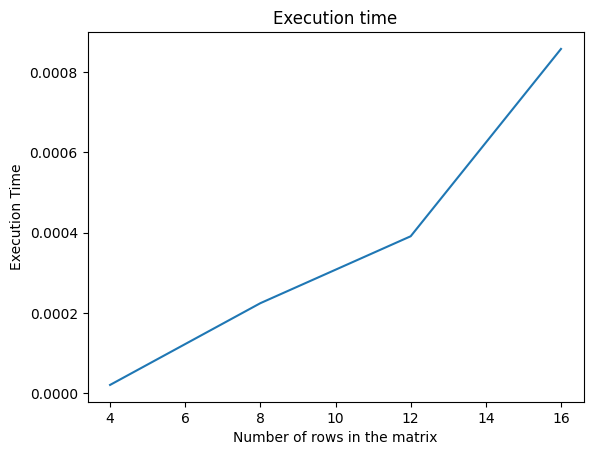

In [31]:
import matplotlib.pyplot as plt

x = [4,8,12,16]
# Insert here the execution times for every
# matrix size
y = [2.0503997802734375e-05,
     0.00022411346435546875,
     0.000390768851144746094,
     0.00085735231204492188]

plt.plot(x, y)
plt.xlabel("Number of rows in the matrix")
plt.ylabel("Execution Time")
plt.title("Execution time")
plt.show()

And then, the number of times that line 40 was executed.

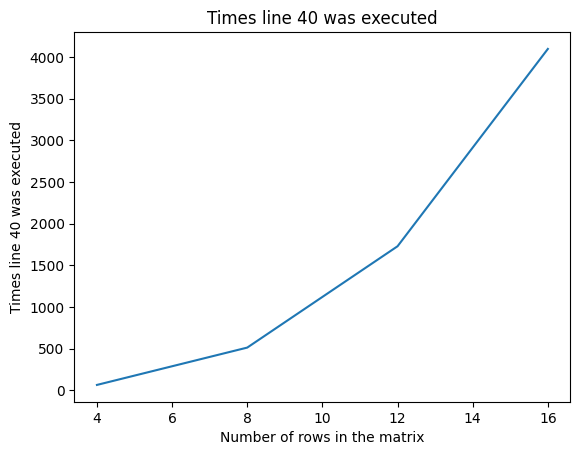

In [32]:
x = [4,8,12,16]
# Insert here the number of times that instruction 40 was executed for every
# matrix size
y = [64, 512, 1728, 4096]

plt.plot(x, y)
plt.xlabel("Number of rows in the matrix")
plt.ylabel("Times line 40 was executed")
plt.title("Times line 40 was executed")
plt.show()

If we call $n$ the number of rows, the rate of growth of both the execution time and the number of times that line 40 is being executed is $O(n^3)$.
This is to say, this algorithm's execution time grows cubically with the number of rows in the matrices being multiplied.

# Answer these questions

1.   How many times is the line 40 executed with the matrices of size $4 \times 4$ ; 64
2.   How many times is the line 40 executed with the matrices of size $8 \times 8$ ; 512
3.   How many times is the line 40 executed with the matrices of size $12 \times 12$ ; 1,728
4.   How many times is the line 40 executed with the matrices of size $16 \times 16$ ; 4,096
5. Which mathematical function describes the number of times that line 40 is executed in the program as a function of the number of rows in a matrix? f(N)=N^3

6. Using the function from you answer to the previous question, how many times would line 40 be executed if you were to multiply tow matrices of size
$100 \times 100$? 1,000,000 times.

7. Are the execution times proportional to the number of times that line 40 is executed? Yes, 4 = 2.0504e-05 s, 8 = 2.2411e-04 s, 12 = 3.9077e-04 s, 16 = 8.5735e-04 s. They all grow roughly like N^3.


